In [1]:
class HashSet(object):
    def __init__(self, sz=256):
        
        # initialize elements to empty lists
        self.items = [[] for _ in range(sz)]
        self.size = sz
    
    
    def __len__(self):
        """ Returns the number of elements in this set """
        return sum([len(it) for it in self.items])
    
    
    def __iter__(self):
        import itertools
        return itertools.chain(*self.items)
    
        
    def index_for(self, item):
        """ Returns the index of the hash bucket for _item_ """
        return hash(item) % self.size
    
    
    def contains(self, item):
        """ Returns True if this set contains _item_ and False otherwise """
        for i in self.items[self.index_for(item)]:
            if i == item:
                return True
        
        return False
    
    
    def add(self, item):
        """ If _item_ is not already in the set, add it to the appropriate
            bucket.  If _item_ is already in the set, do nothing. """
        
        if not self.contains(item):
            self.items[self.index_for(item)].append(item)
    
    
    def add_all(self, items):
        for item in items:
            self.add(item)


    def intersection(self, other):
        """ Returns a new set containing all the items that are members of 
            both this set and _other_ """
        result = HashSet()
        
        # save a bit of time by looping over the elements in 
        # the smaller set, since the intersection will not be 
        # a superset of the elements in the smaller set
        
        if len(self) >= len(other):
            smaller = other
            larger = self
        else:
            smaller = self
            larger = other
        
        for i in smaller:
            if larger.contains(i):
                result.add(i)
        
        return result
    
    
    def union(self, other):
        """ Returns a new set containing all the items that are members of 
            either this set or _other_ """
        result = HashSet()
        
        for i in self:
            result.add(i)
            
        for i in other:
            result.add(i)
        
        return result



# Tests

In [2]:
test1 = HashSet()
for item in ["a", "b", "c", "d", "e", "a", "b", "f"]:
    pre_insert = test1.contains(item)
    test1.add(item)
    post_insert = test1.contains(item)
    print(item, len(test1), sorted(test1), pre_insert, post_insert)

a 1 ['a'] False True
b 2 ['a', 'b'] False True
c 3 ['a', 'b', 'c'] False True
d 4 ['a', 'b', 'c', 'd'] False True
e 5 ['a', 'b', 'c', 'd', 'e'] False True
a 5 ['a', 'b', 'c', 'd', 'e'] True True
b 5 ['a', 'b', 'c', 'd', 'e'] True True
f 6 ['a', 'b', 'c', 'd', 'e', 'f'] False True


We expect the previous cell to print out
```
a 1 ['a'] False True
b 2 ['a', 'b'] False True
c 3 ['a', 'b', 'c'] False True
d 4 ['a', 'b', 'c', 'd'] False True
e 5 ['a', 'b', 'c', 'd', 'e'] False True
a 5 ['a', 'b', 'c', 'd', 'e'] True True
b 5 ['a', 'b', 'c', 'd', 'e'] True True
f 6 ['a', 'b', 'c', 'd', 'e', 'f'] False True```

Once we're confident that adding an element to a set works, we can also run some tests to ensure that intersection and union work the way we'd expect.  For these tests, we'll check to make sure that our set works the same way as Python's built-in `set` type for given inputs.

In [3]:
from itertools import combinations

failures = 0

for t in combinations(combinations(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], 4), 2):
    left = HashSet()
    right = HashSet()
    
    left.add_all(t[0])
    right.add_all(t[1])

    lr = (repr(sorted(left)), repr(sorted(right)))

    if sorted(left.union(right)) != sorted(right.union(left)):
        failures += 1
        print("uh oh, union isn't commutative for %s and %s" % lr)

    if sorted(left.intersection(right)) != sorted(right.intersection(left)):
        failures += 1
        print("uh oh, intersection isn't commutative for %s and %s" % lr)

    if sorted(left.union(right)) != sorted(set(t[0]).union(set(t[1]))):
        failures += 1
        print("union wasn't what we expected for %s and %s" % lr)

    if sorted(left.intersection(right)) != sorted(set(t[0]).intersection(set(t[1]))):
        failures += 1
        print("intersection wasn't what we expected for %s and %s" % lr)
        
print("finished tests with %d failures" % failures)

finished tests with 0 failures


Our last test checks that we handle hash collisions appropriately.

In [4]:
hs = HashSet()

for i in range(1024):
    if len(hs) != i:
        print("len(hs) was %d; expected %d" % (len(hs), i))
    hs.add(i)

Precise sets must use space proportional to the number of elements in the set.  In our implementation, we handle collisions by appending an entry to a list.  This has a performance impact as the number of elements in the hash table continues to grow beyond the number of buckets, since we're no longer looking up an entry in an array keyed by a hash value (which takes *constant time*); we're now looking up an entry in a list (which takes time proportional to the number of elements in the list).

To see this performance impact, let's plot the average time it takes to do one insert and a corresponding lookup as the number of elements grows.

In [5]:
from datasketching import plot

/Users/willb/anaconda/envs/jupyter/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


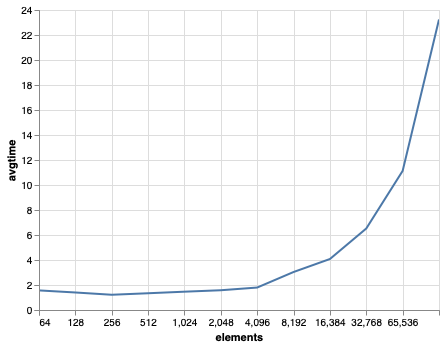

In [6]:
plot.hash_experiment(HashSet(256), 5, 16)